In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from os.path import join

plt.style.use(['science', 'ieee', 'no-latex'])
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.family"] = "Times New Roman"

RESULTS_DIR = "results"
HUE_ORDER = ["Federated", "Centralized", "Decentralized"]
STYLE_ORDER = ["Federated", "Centralized", "Decentralized"]

In [3]:
rewards_df = pd.read_csv(join("..", "out", "experiments", "digital", "rewards.csv"))
rewards_df["trainer_intersection"].replace({
    "grid-3x3": "Grid-3x3", 
    "grid-5x5": "Grid-5x5", 
    "double": "Double"
}, inplace=True)
rewards_df["netfile"].replace({
    "grid-3x3": "Grid-3x3", 
    "grid-5x5": "Grid-5x5", 
    "double": "Double"
}, inplace=True)
rewards_df["trainer"].replace({
    "FedRL": "Federated", 
    "MARL": "Decentralized", 
    "SARL": "Centralized"
}, inplace=True)
rewards_df.head()

Unnamed: 0 tls_id  reward   netfile  step  n_vehicles  \
0           0     A0    -0.0  Grid-3x3     1           1   
1           1     A1    -0.0  Grid-3x3     1           1   
2           2     A2    -0.0  Grid-3x3     1           1   
3           3     B0    -0.0  Grid-3x3     1           1   
4           4     B1    -0.0  Grid-3x3     1           1   

                          policy    trainer trainer_intersection  \
0  v3_pos-reward-aggr_ranked.pkl  Federated               Double   
1  v3_pos-reward-aggr_ranked.pkl  Federated               Double   
2  v3_pos-reward-aggr_ranked.pkl  Federated               Double   
3  v3_pos-reward-aggr_ranked.pkl  Federated               Double   
4  v3_pos-reward-aggr_ranked.pkl  Federated               Double   

  trainer_ranked  mc_run  
0         ranked       0  
1         ranked       0  
2         ranked       0  
3         ranked       0  
4         ranked       0

In [4]:
features_df = pd.read_csv(join("..", "out", "experiments", "digital", "features.csv"))
features_df["trainer_intersection"].replace({
    "grid-3x3": "Grid-3x3", 
    "grid-5x5": "Grid-5x5", 
    "double": "Double"
}, inplace=True)
features_df["netfile"].replace({
    "grid_3x3": "Grid-3x3", 
    "grid_5x5": "Grid-5x5", 
    "double_loop": "Double"
}, inplace=True)
features_df["trainer"].replace({
    "FedRL": "Federated", 
    "MARL": "Decentralized", 
    "SARL": "Centralized"
}, inplace=True)
features_df.head()

Unnamed: 0         feature  value   netfile tls  \
0           0  lane_occupancy    0.0  grid-3x3  A0   
1           1  lane_occupancy    0.0  grid-3x3  A1   
2           2  lane_occupancy    0.0  grid-3x3  A2   
3           3  lane_occupancy    0.0  grid-3x3  B0   
4           4  lane_occupancy    0.0  grid-3x3  B1   

                          policy  ranked    trainer trainer_intersection  \
0  v3_pos-reward-aggr_ranked.pkl    True  Federated               Double   
1  v3_pos-reward-aggr_ranked.pkl    True  Federated               Double   
2  v3_pos-reward-aggr_ranked.pkl    True  Federated               Double   
3  v3_pos-reward-aggr_ranked.pkl    True  Federated               Double   
4  v3_pos-reward-aggr_ranked.pkl    True  Federated               Double   

  trainer_ranked  mc_run  
0         ranked       0  
1         ranked       0  
2         ranked       0  
3         ranked       0  
4         ranked       0

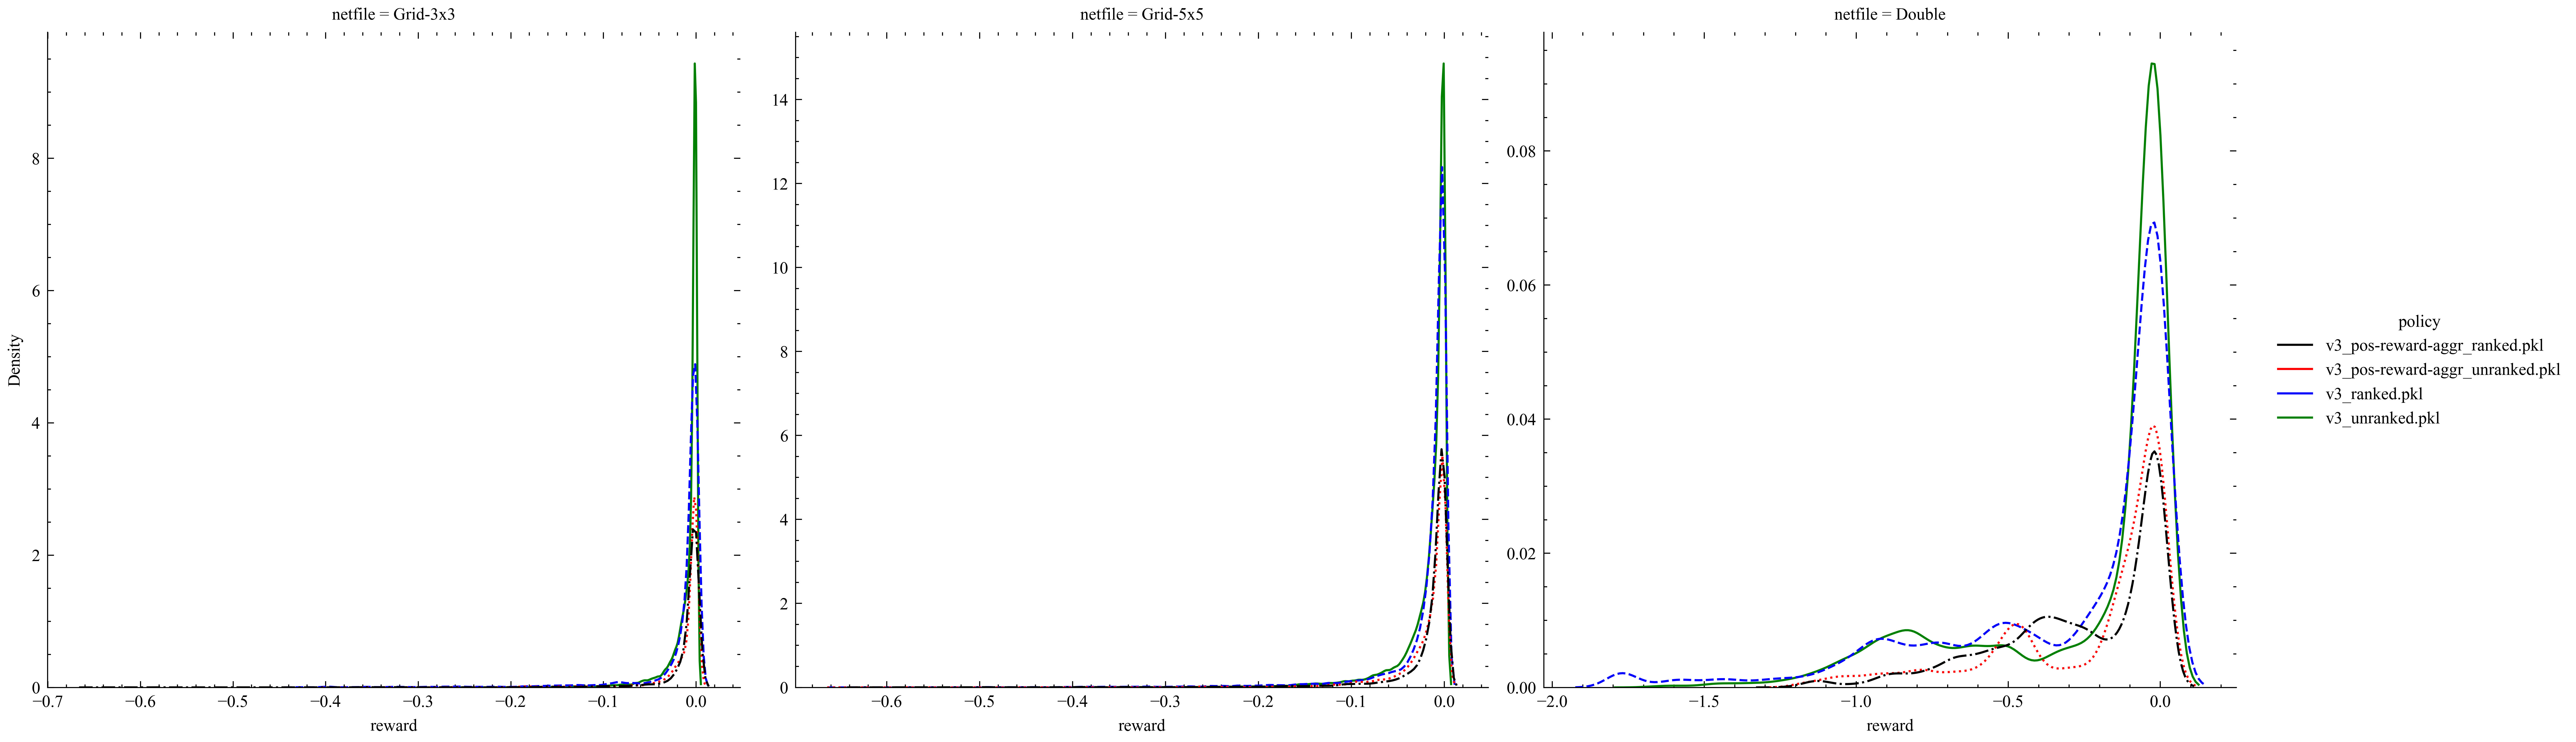

In [5]:
sns.displot(data=rewards_df, kind="kde", col="netfile", x="reward", hue="policy", facet_kws={"sharey": False, "sharex": False})
plt.show()

In [6]:
rewards_df["reward"].describe()

count    2.332800e+06
mean    -3.347972e-02
std      1.106455e-01
min     -1.777778e+00
25%     -1.972604e-02
50%     -5.265232e-03
75%     -8.424371e-04
max     -0.000000e+00
Name: reward, dtype: float64

In [7]:
matrices = {}
for trainer in rewards_df["trainer"].unique():
    for ranked in ["ranked", "unranked"]:
        matrix = []
        for trained_on in ['Grid-3x3', 'Grid-5x5', 'Double']:
            row = []
            for evaled_on in ['Grid-3x3', 'Grid-5x5', 'Double']:
                q = f"trainer == '{trainer}' and trainer_ranked == '{ranked}' and " \
                    f"trainer_intersection == '{trained_on}' and netfile == '{evaled_on}'"
                query = rewards_df.query(q)
                row.append(query["reward"].mean())
            matrix.append(row)
        matrices[trainer, ranked] = np.array(matrix)

matrices.keys()

dict_keys([('Federated', 'ranked'), ('Federated', 'unranked'), ('Decentralized', 'ranked'), ('Decentralized', 'unranked'), ('Centralized', 'ranked'), ('Centralized', 'unranked')])

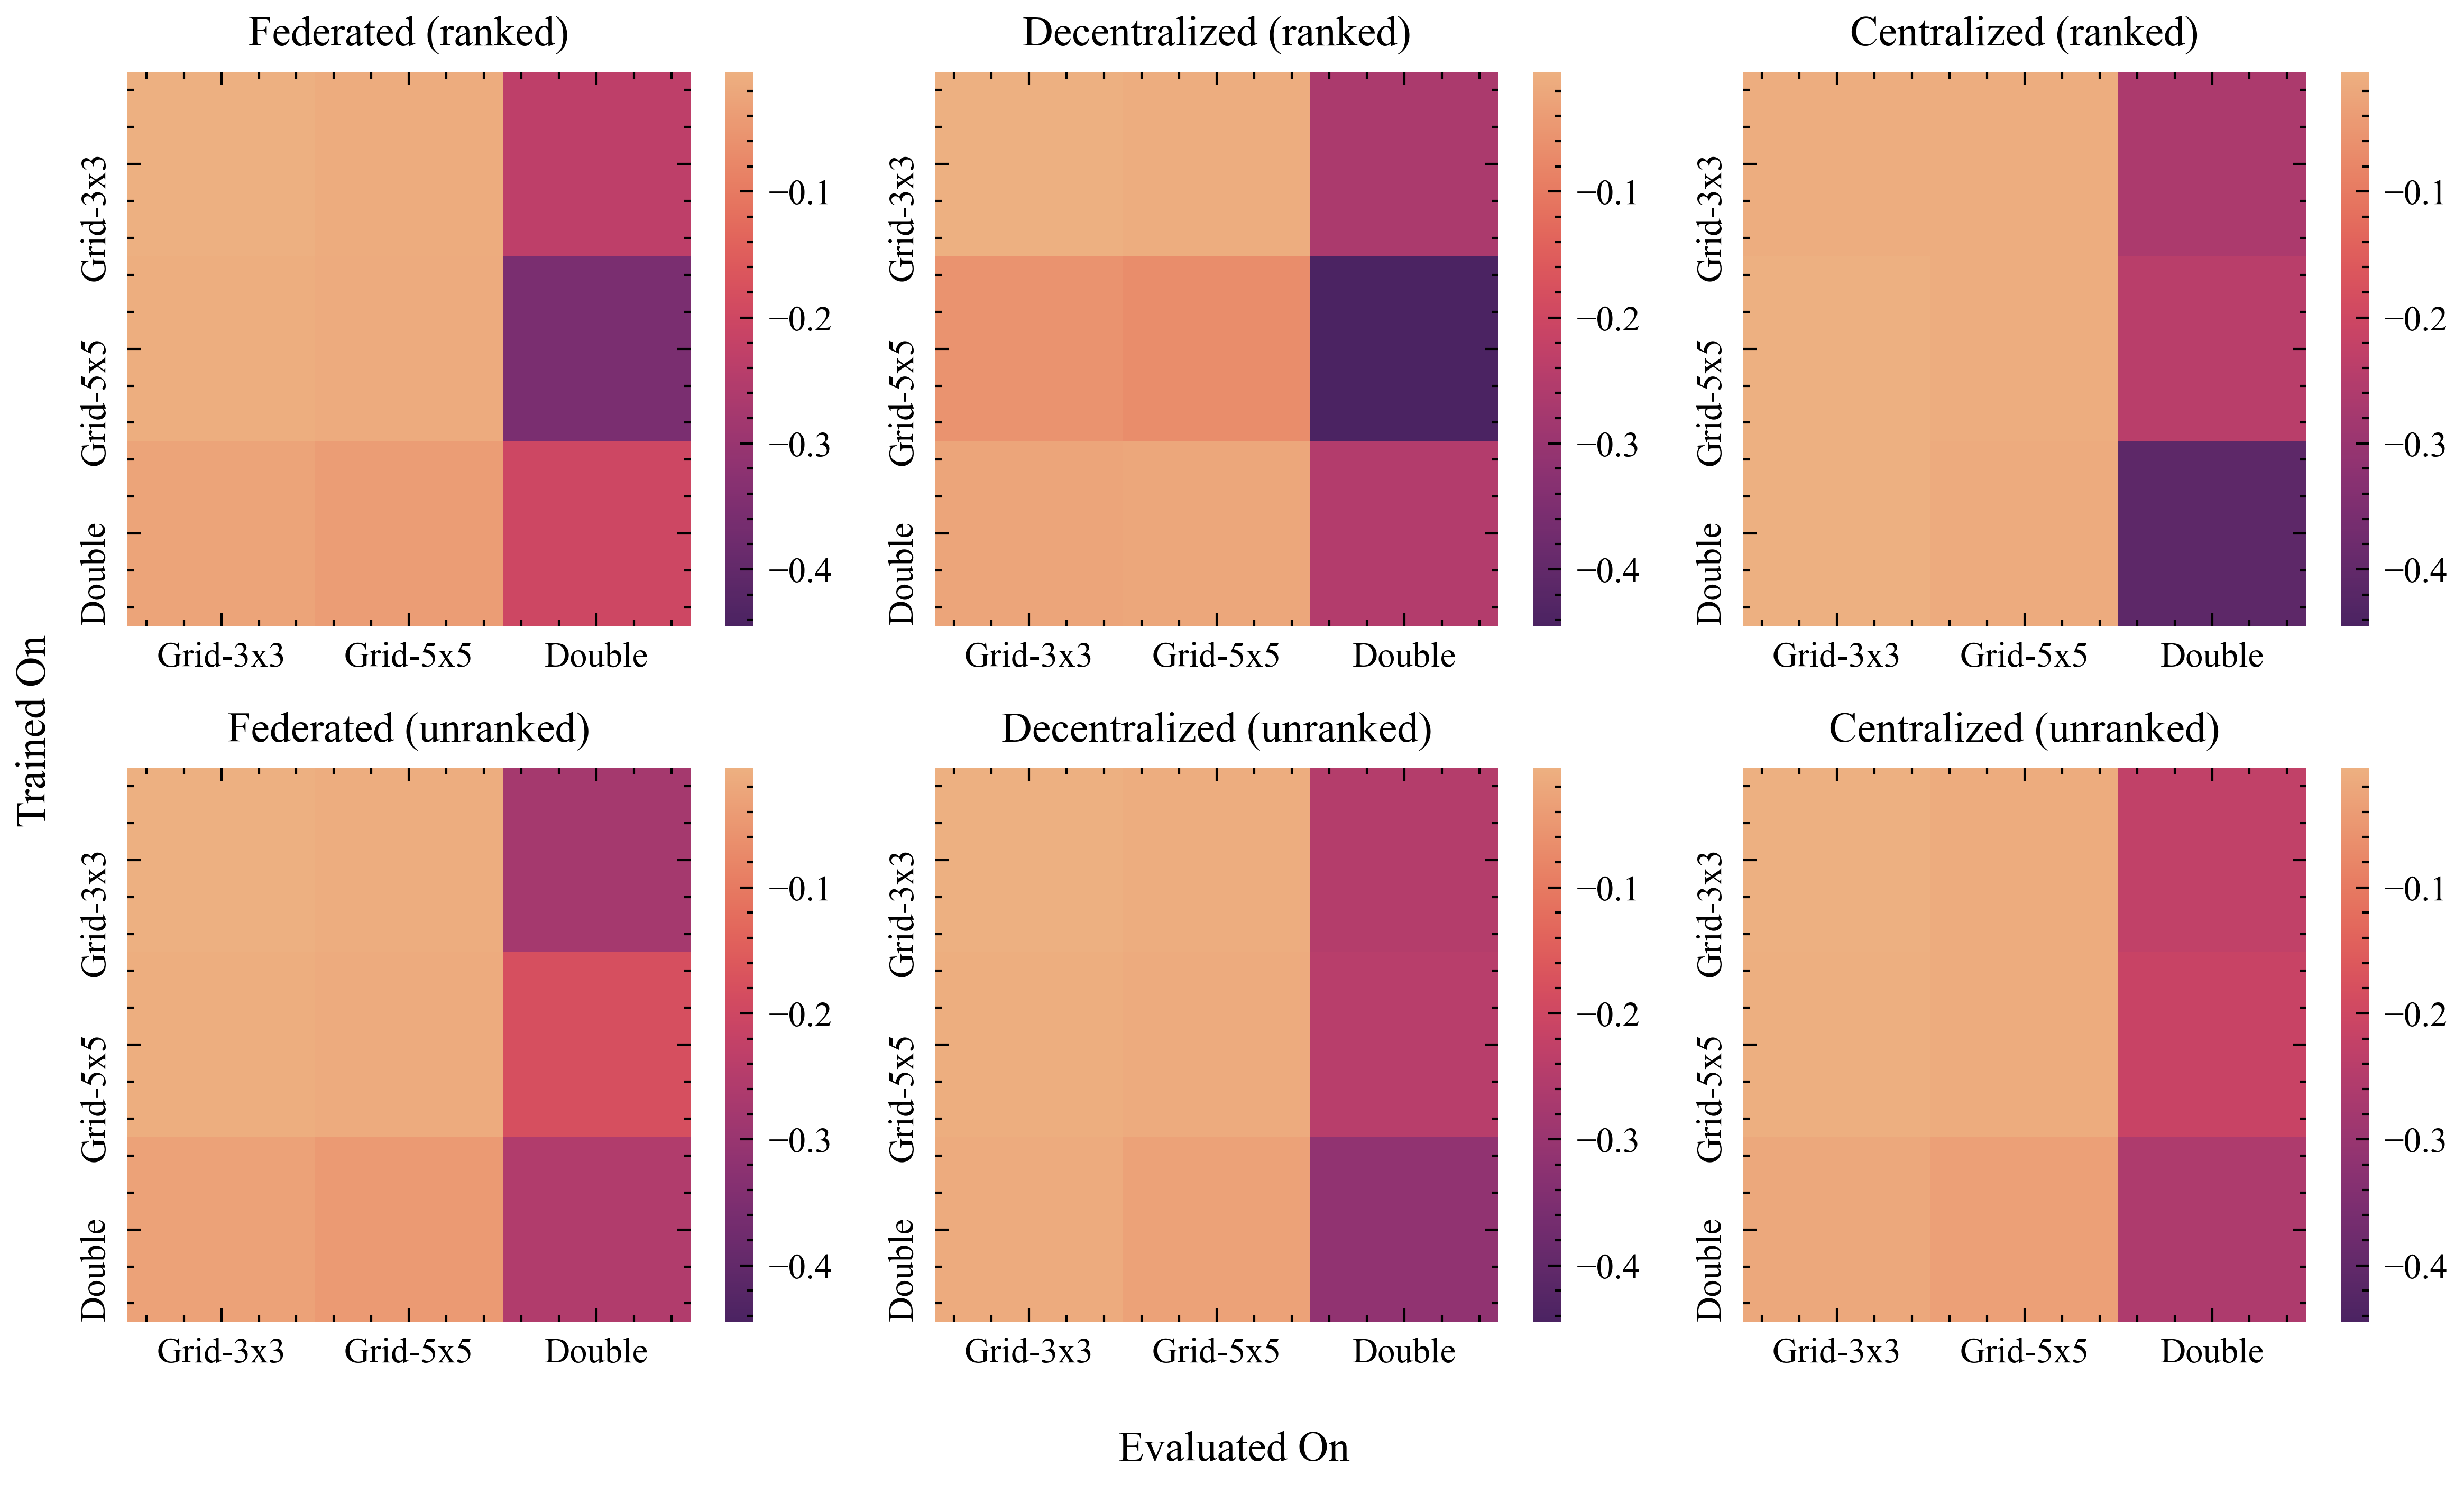

In [8]:
RANKS = ["ranked", "unranked"]
TRAINERS = ["Federated", "Decentralized", "Centralized"]

vmin, vmax = float("inf"), float("-inf")
for matrix in matrices.values():
    mat = matrix.flatten()
    vmin = min(vmin, mat.min())
    vmax = max(vmax, mat.max())
    
fig, axes = plt.subplots(nrows=len(RANKS), ncols=len(TRAINERS), figsize=(8, 4.75))

for row, ranked in enumerate(RANKS):
    for col, trainer in enumerate(TRAINERS):
        f = sns.heatmap(
            matrices[trainer, ranked],
            xticklabels=['Grid-3x3', 'Grid-5x5', 'Double'],
            yticklabels=['Grid-3x3', 'Grid-5x5', 'Double'],
            vmin=vmin,
            vmax=vmax,
            cmap="flare_r",
            ax=axes[row, col]
        )
        axes[row, col].set_title(f"{trainer} ({ranked})")

fig.supylabel("Trained On")
fig.supxlabel("Evaluated On")
plt.tight_layout()
plt.show()

In [9]:
rewards_df["trainer_intersection"].unique()

array(['Double', 'Grid-3x3', 'Grid-5x5'], dtype=object)

In [10]:
rewards_df["netfile"].unique()

array(['Grid-3x3', 'Grid-5x5', 'Double'], dtype=object)

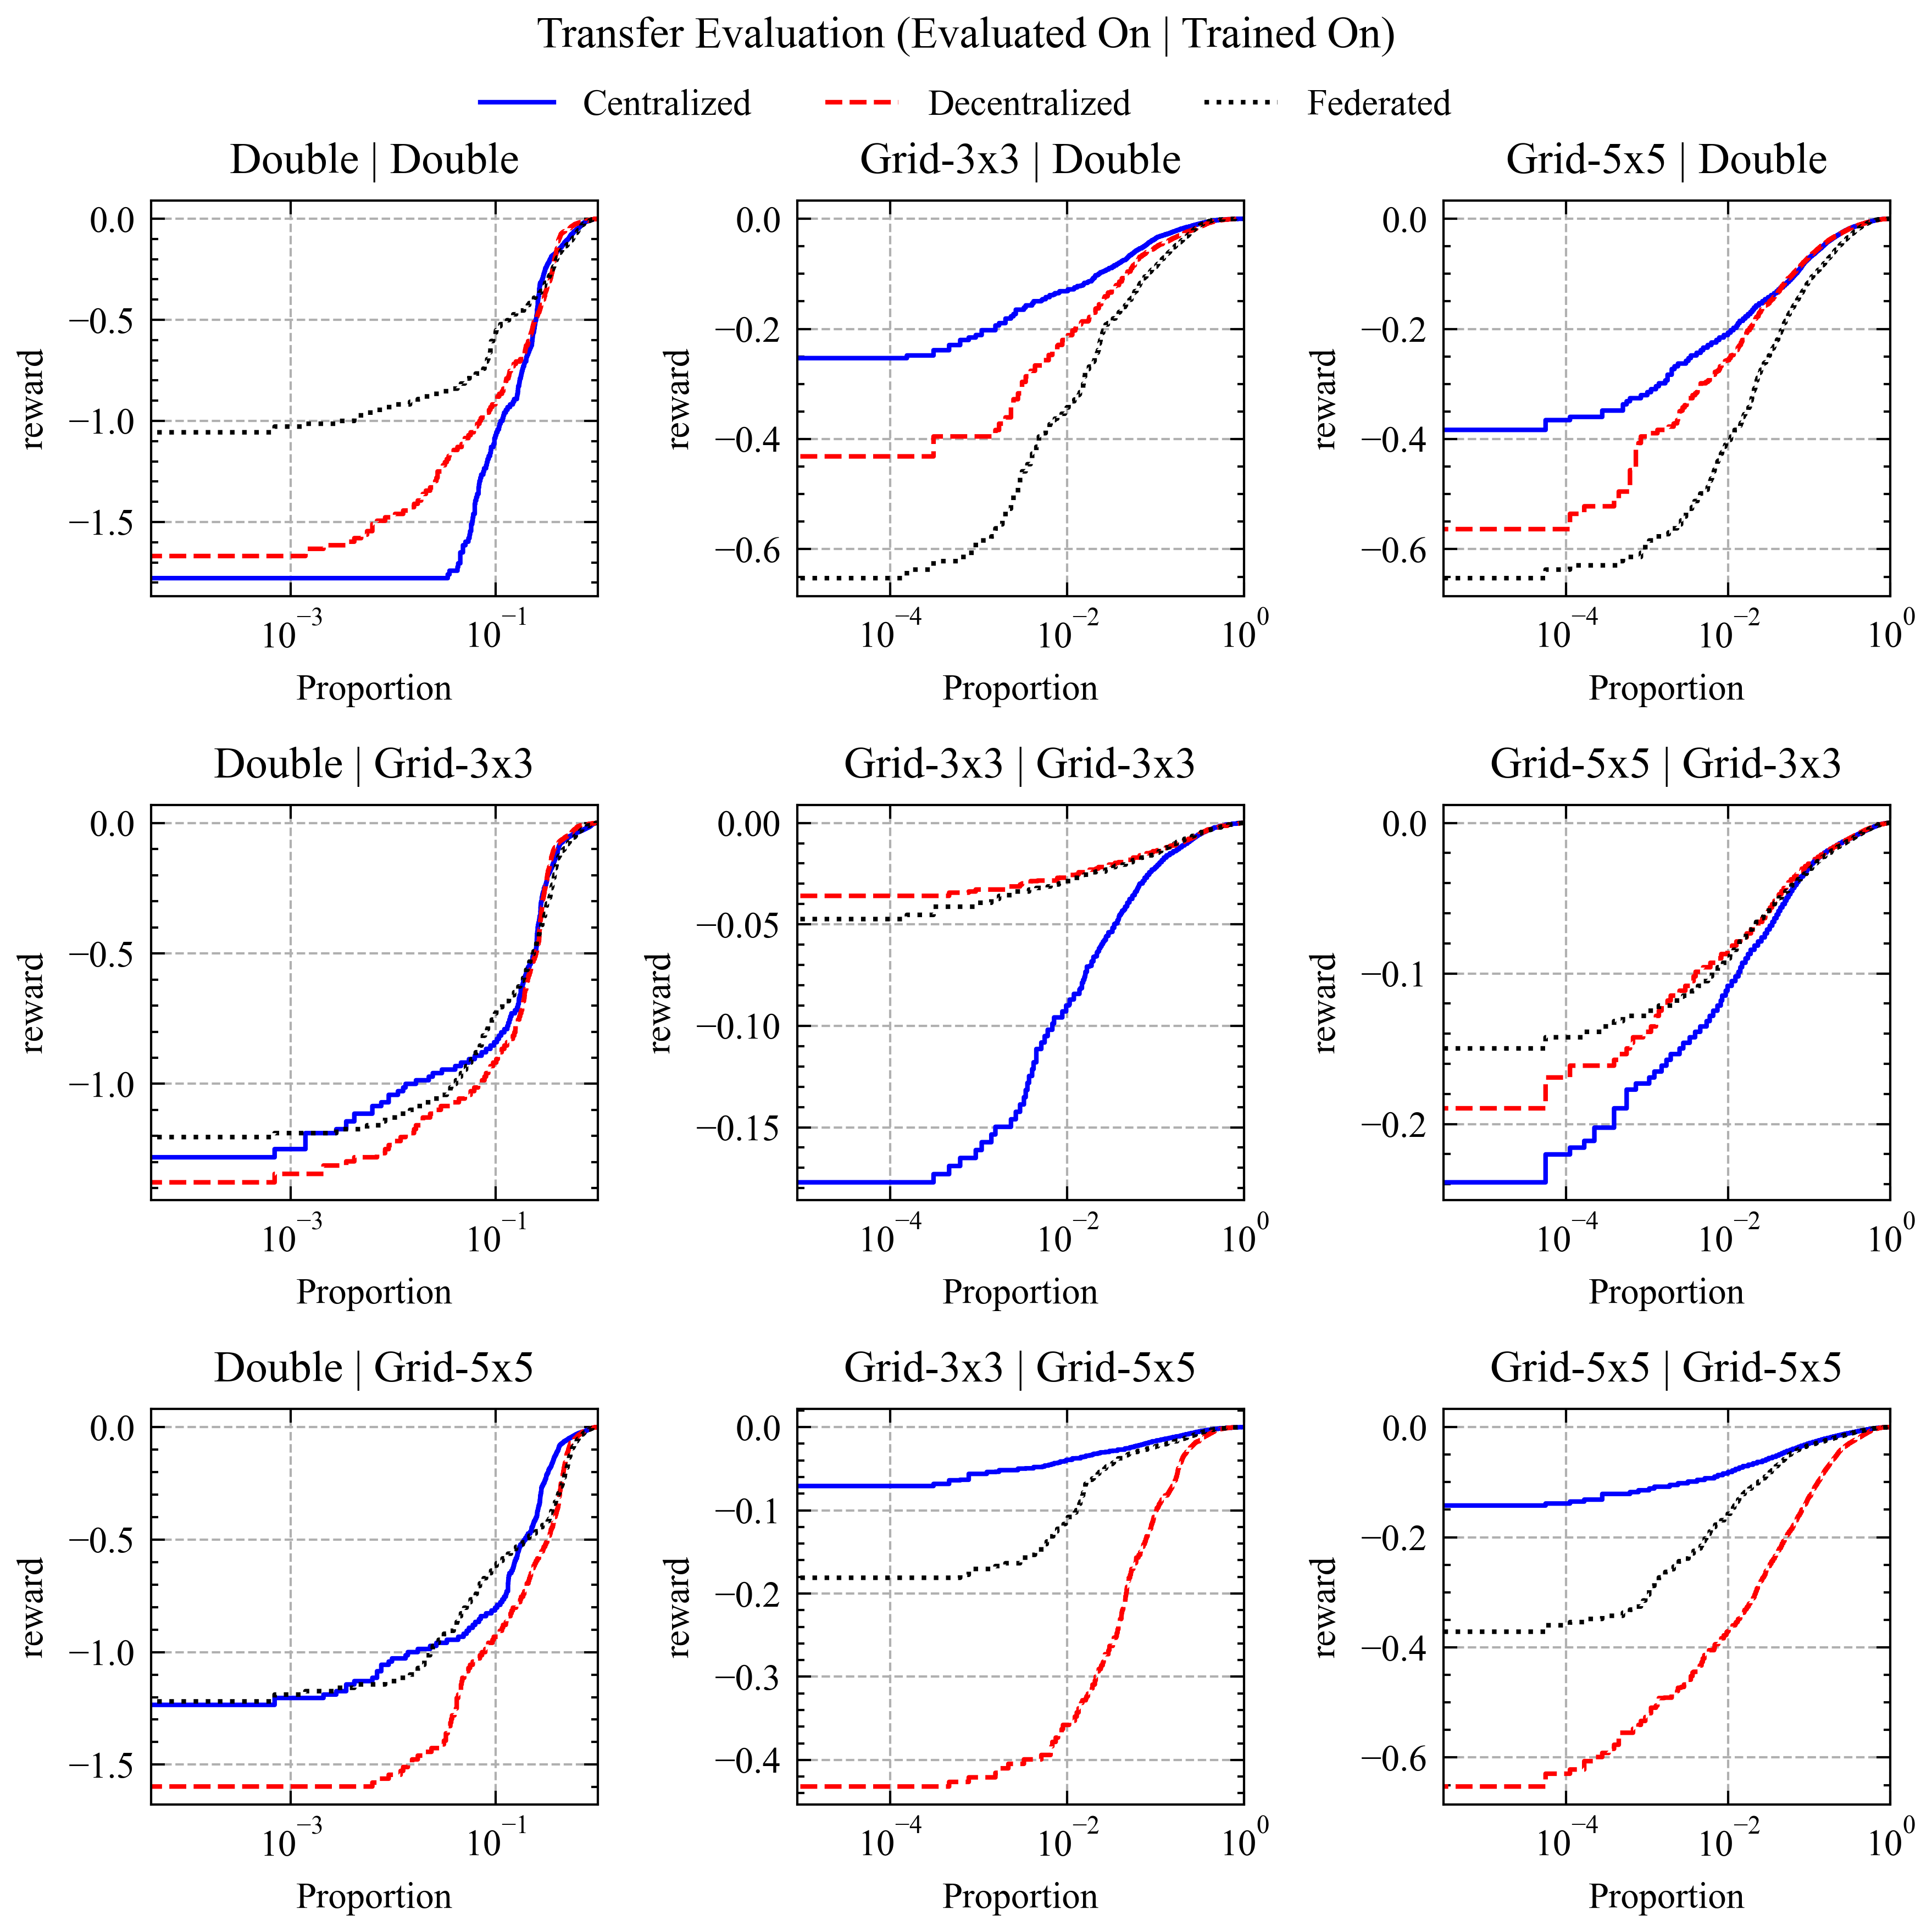

In [11]:
netfiles = ["Double", "Grid-3x3", "Grid-5x5"]

fig, ax = plt.subplots(nrows=len(netfiles), ncols=len(netfiles), figsize=(6, 6))
for row, trained_on in enumerate(netfiles):
    for col, eval_on in enumerate(netfiles):
        q = f"trainer_intersection == '{trained_on}' and netfile == '{eval_on}'"
        sns.ecdfplot(
            data=rewards_df.query(q), 
            y="reward",
            hue="trainer", 
            ax=ax[row, col],
            # multiple="stack",
            # legend=False,
        ).set(xscale="log")
        ax[row, col].set_title(f"{eval_on} | {trained_on}")
        ax[row, col].grid(which="major", linestyle="--")
        children = ax[row, col].get_children()
        # if not (row == len(netfiles) - 1 and col == len(netfiles) - 1):
        #     ax[row, col].get_legend().remove()
        ax[row, col].get_legend().remove()

handles = [child for child in children if isinstance(child, mpl.lines.Line2D)]
labels = ["Centralized", "Decentralized", "Federated"]
fig.legend(handles, labels, frameon=False, ncol=3, loc="upper center", bbox_to_anchor=(0.5, 0.96))
plt.suptitle("Transfer Evaluation (Evaluated On | Trained On)\n")
plt.tight_layout()
plt.show()

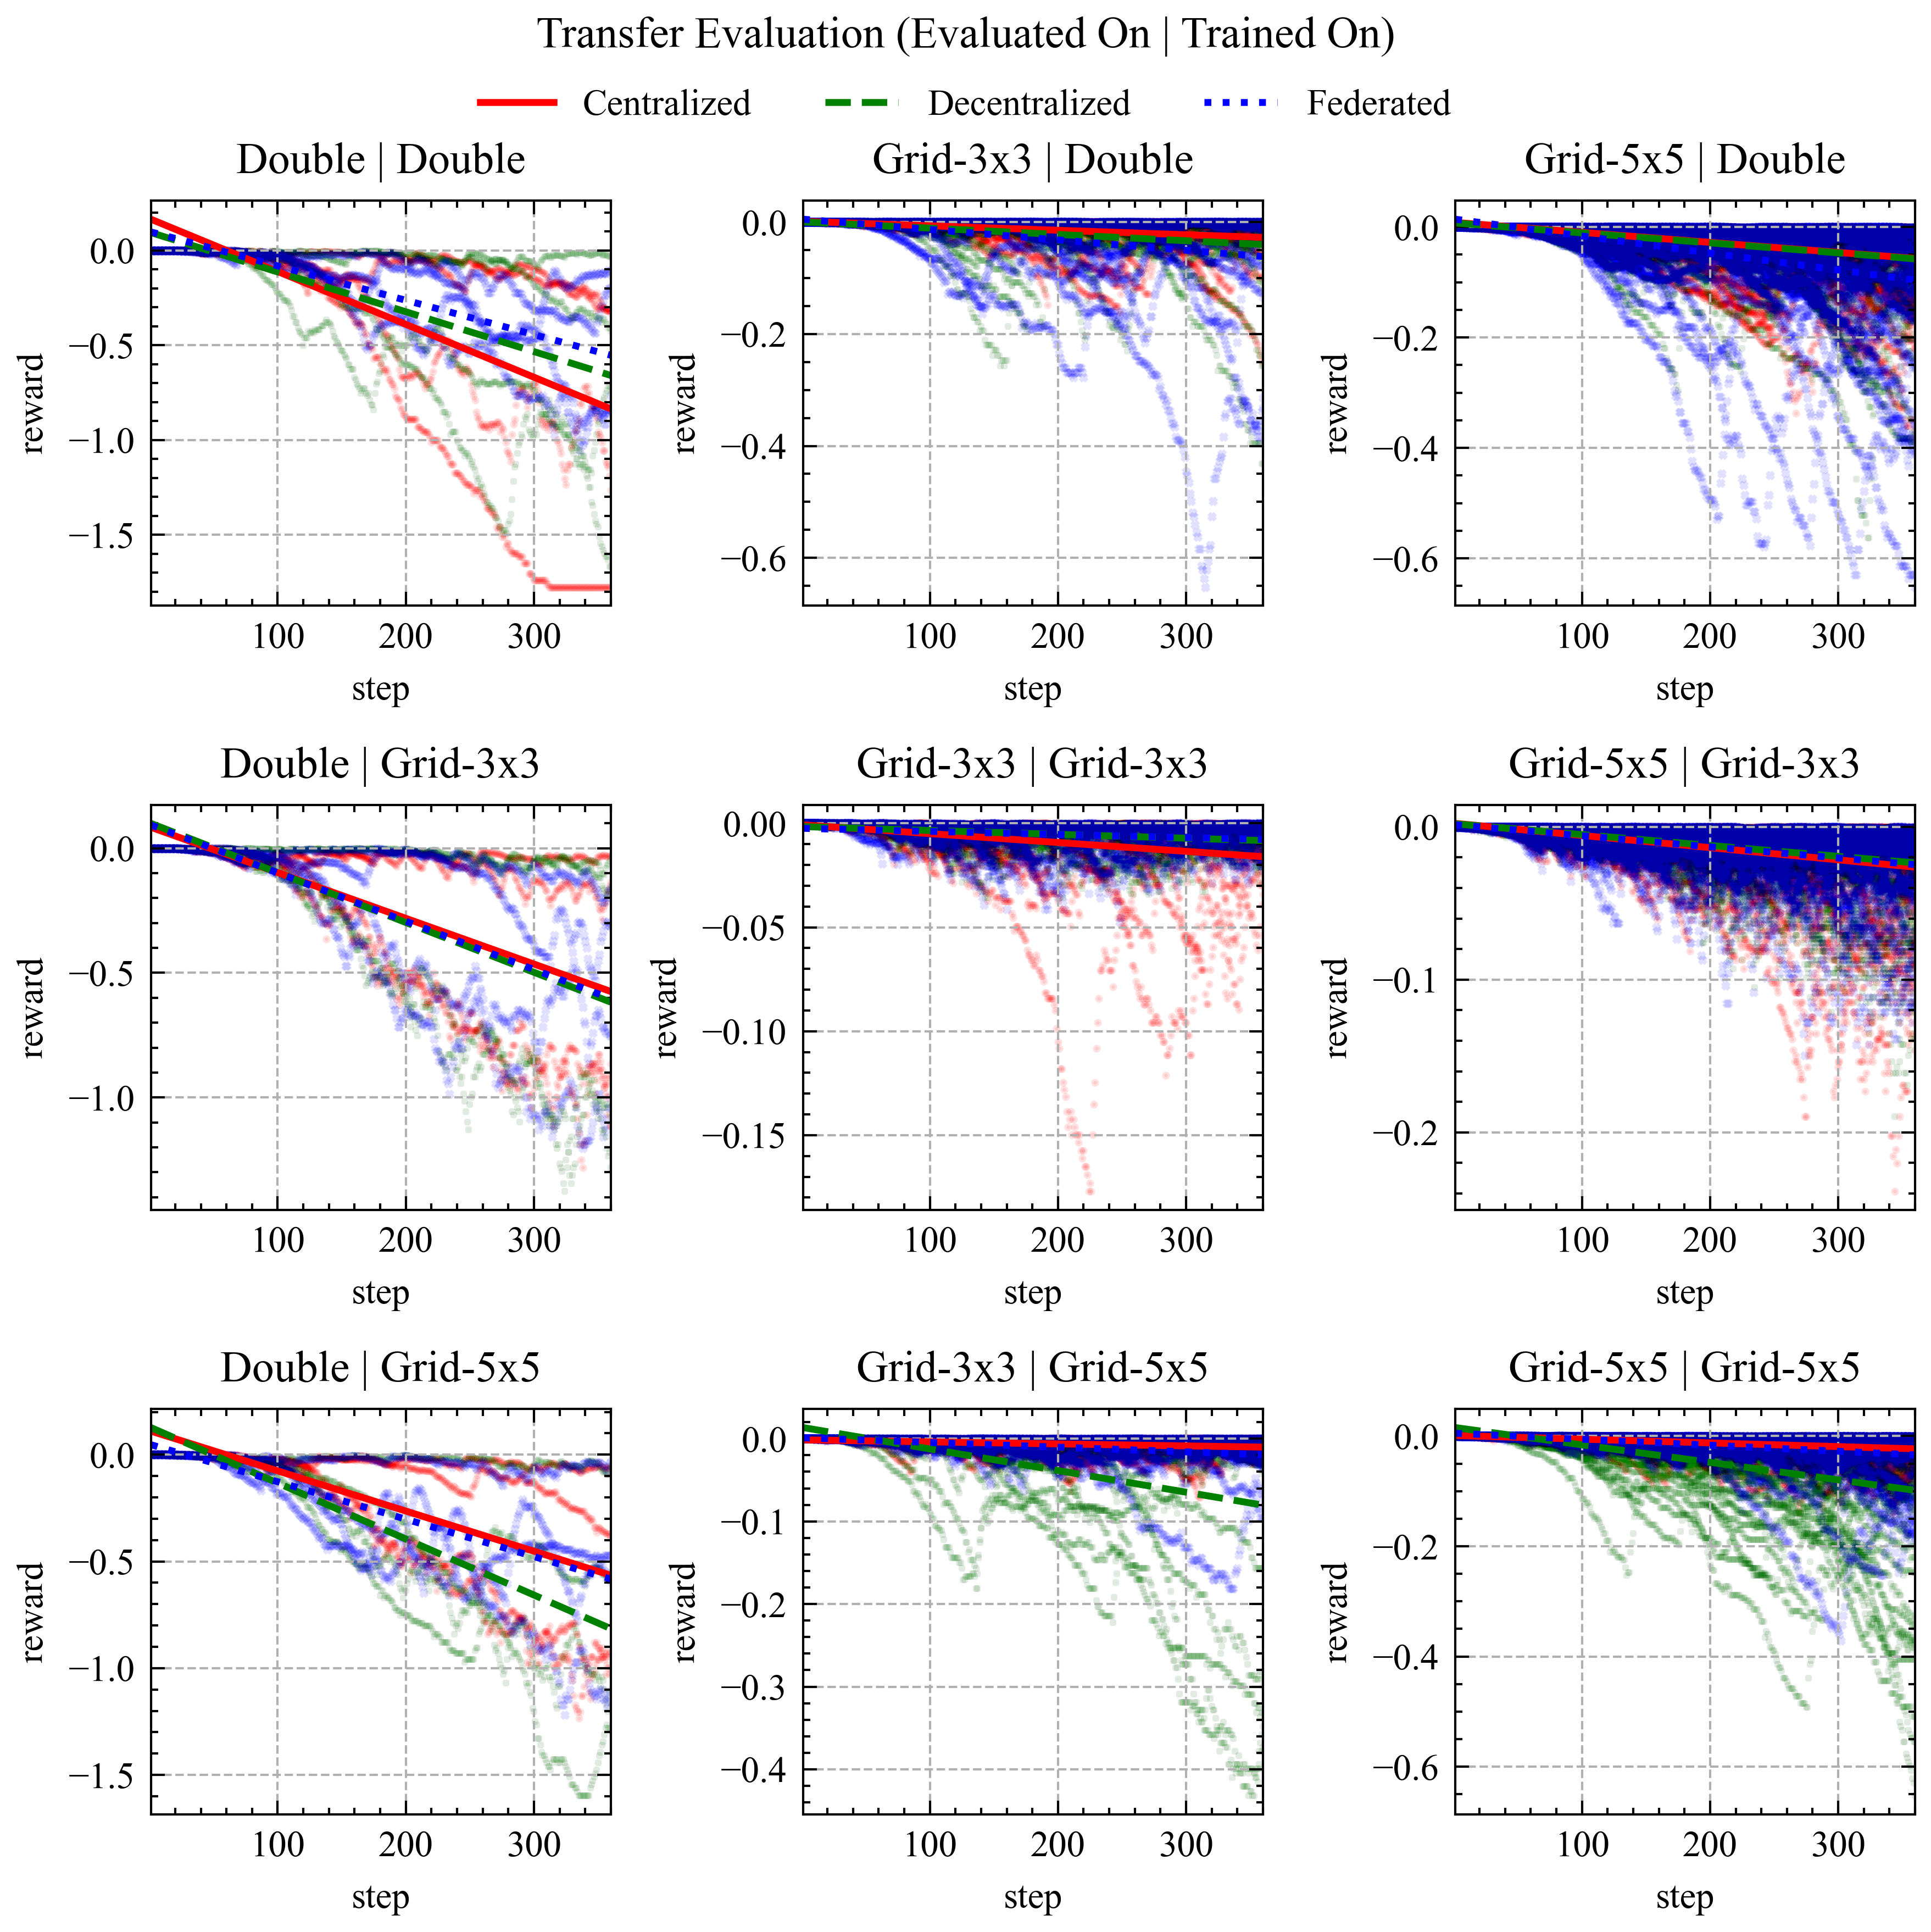

In [12]:
netfiles = ["Double", "Grid-3x3", "Grid-5x5"]

trainers = ["Centralized", "Decentralized", "Federated"]
colors = ["r", "g", "b"]
markers = [".", "+", "x"]

fig, ax = plt.subplots(nrows=len(netfiles), ncols=len(netfiles), figsize=(6, 6))
for row, trained_on in enumerate(netfiles):
    for col, eval_on in enumerate(netfiles):
        for trainer, color, marker in zip(trainers, colors, markers):
            q = f"trainer_intersection == '{trained_on}' and netfile == '{eval_on}' and trainer == '{trainer}'"
            sns.regplot(
                data=rewards_df.query(q), 
                x="step",
                y="reward",
                color=color,
                ax=ax[row, col],
                label=trainer,
                marker=marker,
                scatter_kws={"s": 2, "alpha": 0.01},
                ci=None
            )
        ax[row, col].set_title(f"{eval_on} | {trained_on}")
        ax[row, col].grid(which="major", linestyle="--")
        children = ax[row, col].get_children()
        # if (row == len(netfiles) - 1 and col == len(netfiles) - 1):
        #     ax[row, col].legend(loc="best")

handles = [child for child in children if isinstance(child, mpl.lines.Line2D)]
labels = ["Centralized", "Decentralized", "Federated"]
fig.legend(handles, labels, frameon=False, ncol=3, loc="upper center", bbox_to_anchor=(0.5, 0.96))
plt.suptitle("Transfer Evaluation (Evaluated On | Trained On)\n")
plt.tight_layout()
plt.show()

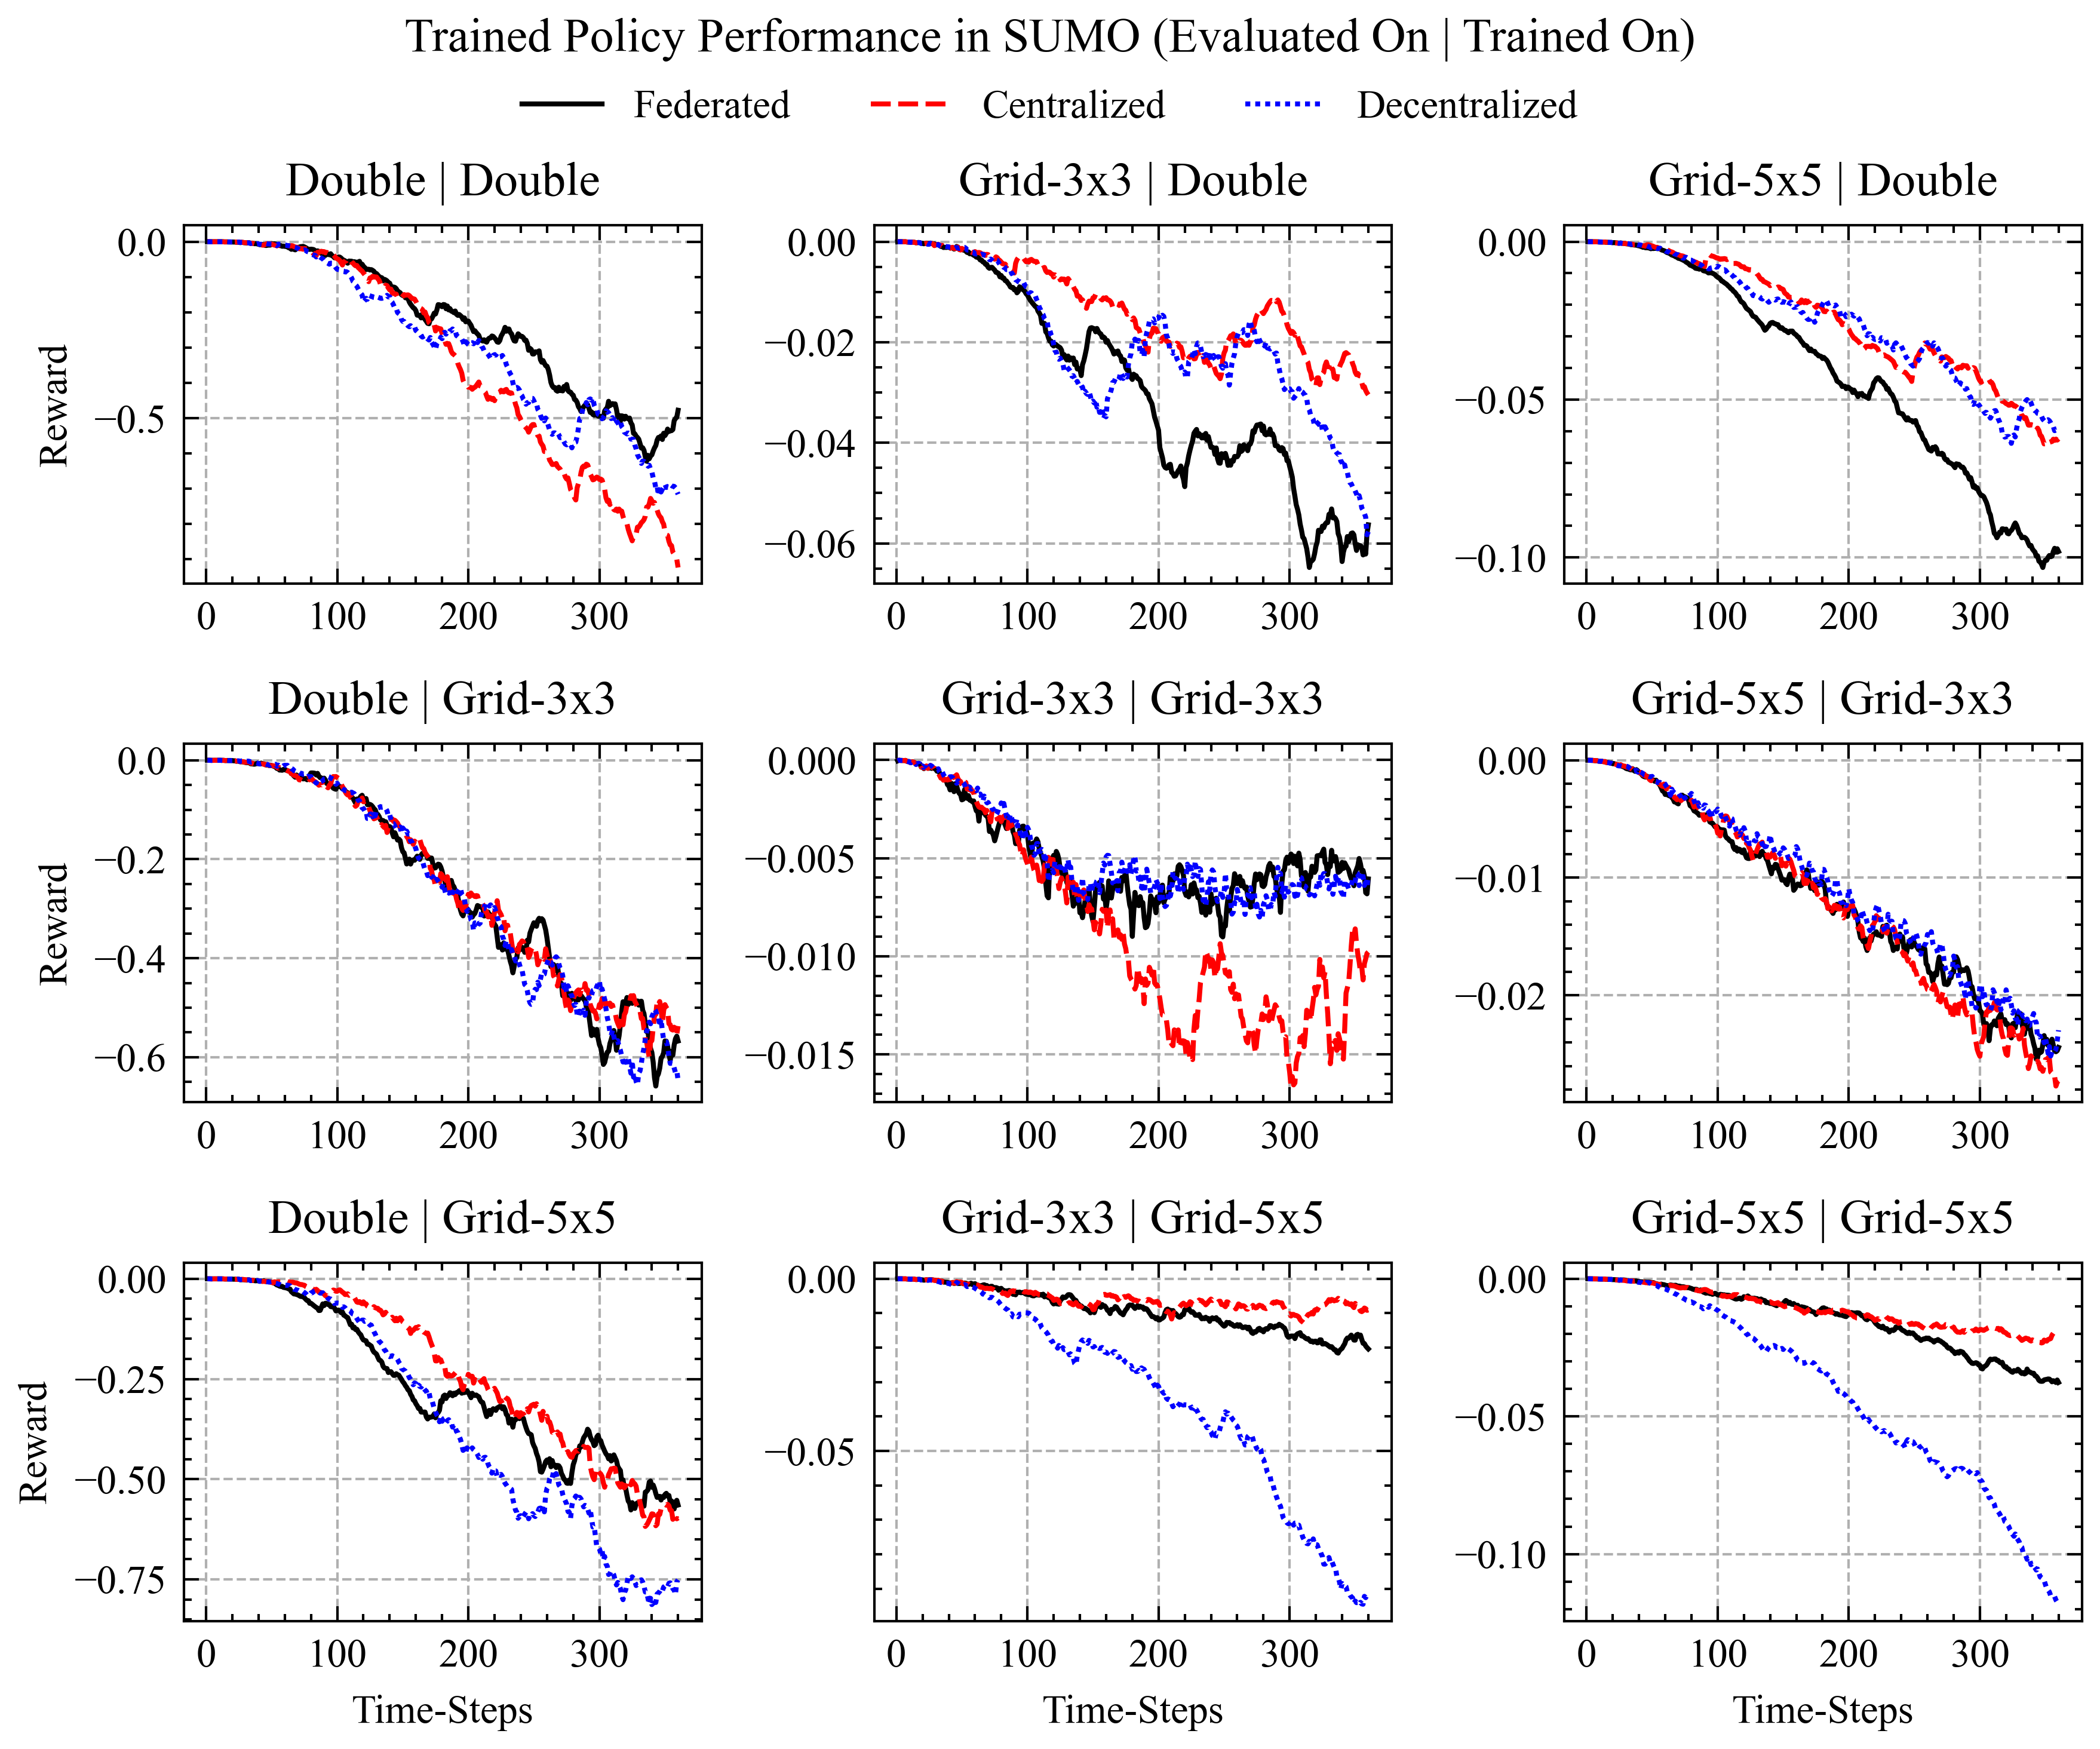

In [18]:
netfiles = ["Double", "Grid-3x3", "Grid-5x5"]

trainers = ["Centralized", "Decentralized", "Federated"]
colors = ["r", "g", "b"]
markers = [".", "+", "x"]

fig, ax = plt.subplots(nrows=len(netfiles), ncols=len(netfiles), figsize=(6, 5))
for row, trained_on in enumerate(netfiles):
    for col, eval_on in enumerate(netfiles):
        q = f"trainer_intersection == '{trained_on}' and netfile == '{eval_on}'"
        sns.lineplot(
            data=rewards_df.query(q), 
            x="step",
            y="reward",
            hue="trainer",
            style="trainer",
            hue_order=HUE_ORDER,
            style_order=STYLE_ORDER,
            ax=ax[row, col],
            ci=None
        )

        ax[row, col].set_title(f"{eval_on} | {trained_on}")
        ax[row, col].grid(which="major", linestyle="--")
        children = ax[row, col].get_children()
        ax[row, col].get_legend().remove()
        # if (row == len(netfiles) - 1 and col == len(netfiles) - 1):
        #     ax[row, col].legend(loc="best")

        if col == 0:
            ax[row, col].set_ylabel("Reward")
        else:
            ax[row, col].set_ylabel("")

        if row == len(netfiles) - 1:
            ax[row, col].set_xlabel("Time-Steps")
        else:
            ax[row, col].set_xlabel("")

handles = [child for child in children if isinstance(child, mpl.lines.Line2D)]
labels = HUE_ORDER
fig.legend(handles, labels, frameon=False, ncol=3, loc="upper center", bbox_to_anchor=(0.5, 0.96))
plt.suptitle("Trained Policy Performance in SUMO (Evaluated On | Trained On)\n")
plt.tight_layout()
plt.savefig(join(RESULTS_DIR, "sumo_eval_plots.pdf"))
plt.show()